In [1]:
import pandas_datareader as pdr
import pandas as pd


In [ ]:
key='2a380557aa931210bbc5213ef4bdad17e00b7d36'
df=pdr.get_data_tiingo('AAPL',api_key=key)


NameError: name 'df' is not defined

In [2]:
df=pd.read_csv('/content/AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087894,0.087894,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10745,2023-07-28 00:00:00-04:00,194.669998,196.630005,194.139999,195.830002,48291400,0.0,0.0
10746,2023-07-31 00:00:00-04:00,196.059998,196.490005,195.259995,196.449997,38824100,0.0,0.0
10747,2023-08-01 00:00:00-04:00,196.240005,196.729996,195.279999,195.610001,35175100,0.0,0.0
10748,2023-08-02 00:00:00-04:00,195.039993,195.179993,191.850006,192.580002,50241600,0.0,0.0
10749,2023-08-03 00:00:00-04:00,191.570007,192.369995,190.839996,191.929993,25277752,0.0,0.0


In [4]:
df2=df.reset_index()['Open']

In [ ]:
df2.shape

(10750,)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

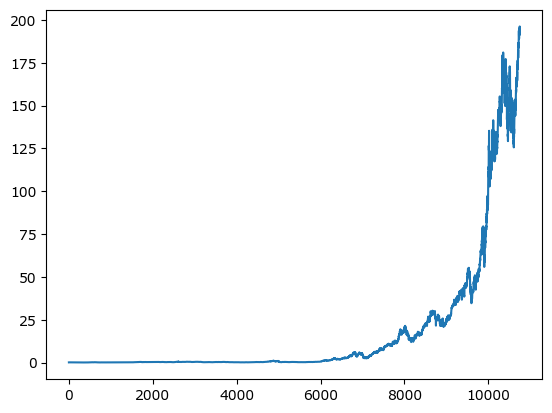

In [ ]:
df2.plot()

LSTM

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [8]:
df2.shape

(10750, 1)

In [9]:
df2

array([[3.11156183e-04],
       [2.86882982e-04],
       [2.51572935e-04],
       ...,
       [1.00000000e+00],
       [9.93883776e-01],
       [9.76197945e-01]])

In [10]:
training_size=int(len(df2)*0.65)
testing_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [11]:
train_data

array([[0.00031116],
       [0.00028688],
       [0.00025157],
       ...,
       [0.02696672],
       [0.02680737],
       [0.02684295]])

In [12]:
test_data

array([[0.02679654],
       [0.0270054 ],
       [0.02705644],
       ...,
       [1.        ],
       [0.99388378],
       [0.97619795]])

In [13]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [14]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,ytest=create_dataset(test_data,time_step)

In [15]:
x_train

array([[0.00031116, 0.00028688, 0.00025157, ..., 0.00030454, 0.00030233,
        0.00028909],
       [0.00028688, 0.00025157, 0.0002604 , ..., 0.00030233, 0.00028909,
        0.0002935 ],
       [0.00025157, 0.0002604 , 0.00027364, ..., 0.00028909, 0.0002935 ,
        0.00029792],
       ...,
       [0.02159814, 0.02222939, 0.02174203, ..., 0.02664956, 0.02733958,
        0.02739373],
       [0.02222939, 0.02174203, 0.02196946, ..., 0.02733958, 0.02739373,
        0.02750358],
       [0.02174203, 0.02196946, 0.02243824, ..., 0.02739373, 0.02750358,
        0.02696672]])

In [16]:
x_train.shape

(6886, 100)

In [ ]:
y_train.shape

(6886,)

In [ ]:
x_test.shape

(3662, 100)

In [17]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [31]:
import keras as keras
import tensorflow as tf
from keras import layers
from tensorflow.keras.layers import Dense,LSTM

In [33]:
model=keras.Sequential()
model.add(tf.keras.layers.LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(tf.keras.layers.LSTM(50,return_sequences=True))
model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.fit(x_train,y_train,validation_data=(x_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
108/108 [==============================] - 34s 313ms/step - loss: 1.9412e-07 - val_loss: 0.0021
Epoch 2/100
108/108 [==============================] - 24s 220ms/step - loss: 1.6067e-07 - val_loss: 0.0023
Epoch 3/100
108/108 [==============================] - 23s 217ms/step - loss: 2.1991e-07 - val_loss: 0.0035
Epoch 4/100
108/108 [==============================] - 22s 206ms/step - loss: 1.4636e-07 - val_loss: 0.0021
Epoch 5/100
108/108 [==============================] - 24s 226ms/step - loss: 1.5877e-07 - val_loss: 0.0018
Epoch 6/100
108/108 [==============================] - 24s 225ms/step - loss: 2.3116e-07 - val_loss: 0.0030
Epoch 7/100
108/108 [==============================] - 24s 224ms/step - loss: 1.5644e-07 - val_loss: 0.0041
Epoch 8/100
108/108 [==============================] - 22s 206ms/step - loss: 1.7607e-07 - val_loss: 0.0021
Epoch 9/100
108/108 [==============================] - 24s 220ms/step - loss: 1.5252e-07 - val_loss: 0.0029
Epoch 10/100
108/108 [======

In [38]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

115/115 [==============================] - 4s 37ms/step


In [40]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
#for training data
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.1703446393398909

In [43]:
math.sqrt(mean_squared_error(ytest,test_predict))

53.965408820712796

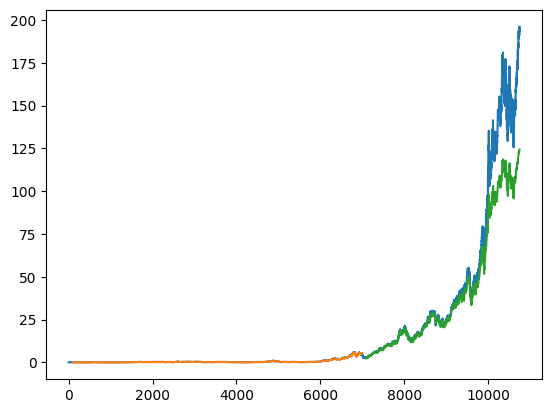

In [45]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

3763

In [48]:
x_input=test_data[3663:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.633214]
101
1 day input [0.76978273 0.76932469 0.77426175 0.79421361 0.789073   0.8005249
 0.81060267 0.80821044 0.80836316 0.81386009 0.80383325 0.81095892
 0.82195282 0.82658452 0.83589879 0.84775795 0.83829097 0.82653351
 0.82139288 0.82612644 0.82037496 0.8224618  0.83752748 0.84007234
 0.84521307 0.84368613 0.84516207 0.83986879 0.83961429 0.84058134
 0.82974013 0.84058134 0.85737757 0.86139843 0.86552112 0.86251821
 0.83905438 0.87005103 0.87768565 0.88058688 0.8804342  0.88465873
 0.88471029 0.88236581 0.87640256 0.87497546 0.8815503  0.89882845
 0.88654514 0.88221291 0.87181539 0.87854321 0.88318131 0.90173367
 0.90361946 0.90550525 0.92247761 0.93063253 0.91707501 0.90927691
 0.9065246  0.92487311 0.92370087 0.93149897 0.93440411 0.93741128
 0.95152937 0.93970483 0.94220221 0.93628998 0.94551518 0.95203908
 0.94724807 0.95764551 0.96350688 0.97650374 0.98746183 0.97619795
 0.96738042 0.97538244 0.96442427 0.96391463 0.96656492 0.97074433
 0.96936817 0.97787982 0.98527025 0.

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df2)

10750

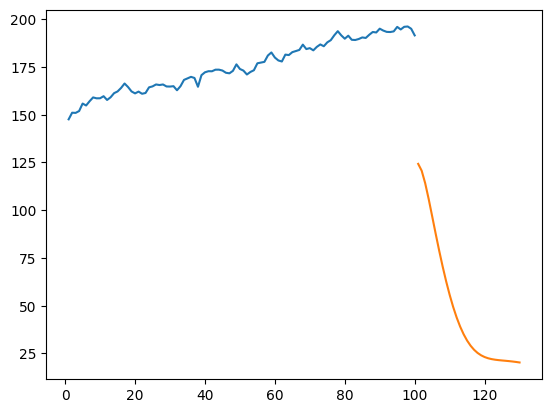

In [55]:
plt.plot(day_new,scaler.inverse_transform(df2[10650:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

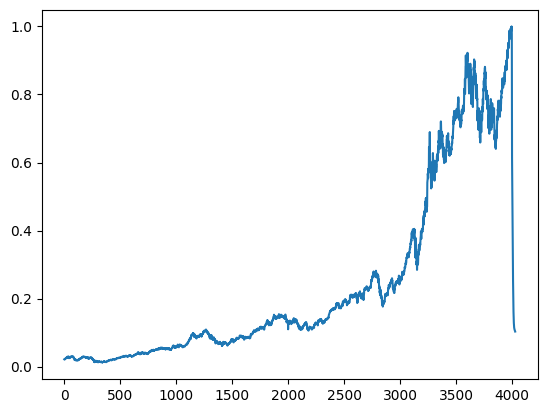

In [59]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[6750:])

In [58]:
len(df3)

10780